<a href="https://colab.research.google.com/github/Maha3061/Global-Terrorism-Analysis/blob/main/weaponclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Display up to 150 rows and columns
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

In [ ]:
# Load the preprocessed GTD dataset
gtd_df = pd.read_csv('/content/drive/MyDrive/data/gtdeda.csv', low_memory=False, index_col = 0,
                      na_values=[''])

In [ ]:
# Display a summary of the data frame
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110698 entries, 197001000000.0 to 201712000000.0
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             110698 non-null  int64  
 1   imonth            110698 non-null  int64  
 2   iday              110698 non-null  int64  
 3   country_txt       110698 non-null  object 
 4   region_txt        110698 non-null  object 
 5   provstate         110698 non-null  object 
 6   city              110698 non-null  object 
 7   latitude          110698 non-null  float64
 8   longitude         110698 non-null  float64
 9   specificity       110698 non-null  float64
 10  summary           110698 non-null  object 
 11  attacktype1_txt   110698 non-null  object 
 12  targtype1_txt     110698 non-null  object 
 13  targsubtype1_txt  110698 non-null  object 
 14  corp1             110698 non-null  object 
 15  target1           110698 non-null  object 
 1

In [ ]:
# List of attributes that are categorical
cat_attrs = ['extended_txt', 'country_txt', 'region_txt', 'specificity', 'vicinity_txt',
             'crit1_txt', 'crit2_txt', 'crit3_txt', 'doubtterr_txt', 'multiple_txt',
             'success_txt', 'suicide_txt', 'attacktype1_txt', 'targtype1_txt',
             'targsubtype1_txt', 'natlty1_txt', 'guncertain1_txt', 'individual_txt',
             'claimed_txt', 'weaptype1_txt', 'weapsubtype1_txt', 'property_txt',
             'ishostkid_txt', 'INT_LOG_txt', 'INT_IDEO_txt','INT_MISC_txt', 'INT_ANY_txt']

for cat in cat_attrs:
    gtd_df[cat] = gtd_df[cat].astype('category')


# Data time feature added during EDA
gtd_df['incident_date'] = pd.to_datetime(gtd_df['incident_date'])

# To prevent a mixed data type
gtd_df['gname'] = gtd_df['gname'].astype('str')

gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Float64Index: 110698 entries, 197001000000.0 to 201712000000.0
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   iyear             110698 non-null  int64         
 1   imonth            110698 non-null  int64         
 2   iday              110698 non-null  int64         
 3   country_txt       110698 non-null  category      
 4   region_txt        110698 non-null  category      
 5   provstate         110698 non-null  object        
 6   city              110698 non-null  object        
 7   latitude          110698 non-null  float64       
 8   longitude         110698 non-null  float64       
 9   specificity       110698 non-null  category      
 10  summary           110698 non-null  object        
 11  attacktype1_txt   110698 non-null  category      
 12  targtype1_txt     110698 non-null  category      
 13  targsubtype1_txt  110698 non-null  c

In [ ]:
# Seed for reproducible results
seed = 1009

# Predictor variables with one hot encoding
X = pd.get_dummies(gtd_df[['country_txt', 'region_txt', 'attacktype1_txt', 'nkill']],
                   drop_first = True)

# Labels
y = gtd_df['weaptype1_txt']

# Create an 80/20 split for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed, stratify = y)

In [ ]:
start = time.time()

# Create the classifier
knn1 = KNeighborsClassifier(n_neighbors = 12)
print("The KNN classifier parameter:\n")
print(knn1)

# Fit it using the training data
knn1.fit(X_train, y_train)

# Predict the lables using the test dataset
pred_lables1 = knn1.predict(X_test)

# Display a sample of the predictions
print("\nTest set predictions:\n {}".format(pred_lables1))

# Calculate the accuracy
score1 = accuracy_score(y_test, pred_lables1)
print("\nAccuracy: {}".format(score1))

end = time.time()
print("\nExecution Seconds: {}".format((end - start)))

The KNN classifier parameter:

KNeighborsClassifier(n_neighbors=12)

Test set predictions:
 ['Explosives' 'Firearms' 'Explosives' ... 'Incendiary' 'Explosives'
 'Firearms']

Accuracy: 0.8935411020776874

Execution Seconds: 39.76228594779968


In [ ]:
start = time.time()

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn2 = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn2.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn2.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn2.score(X_test, y_test)


end = time.time()
print("Execution Seconds: {}".format((end - start)))

Execution Seconds: 2225.2552330493927


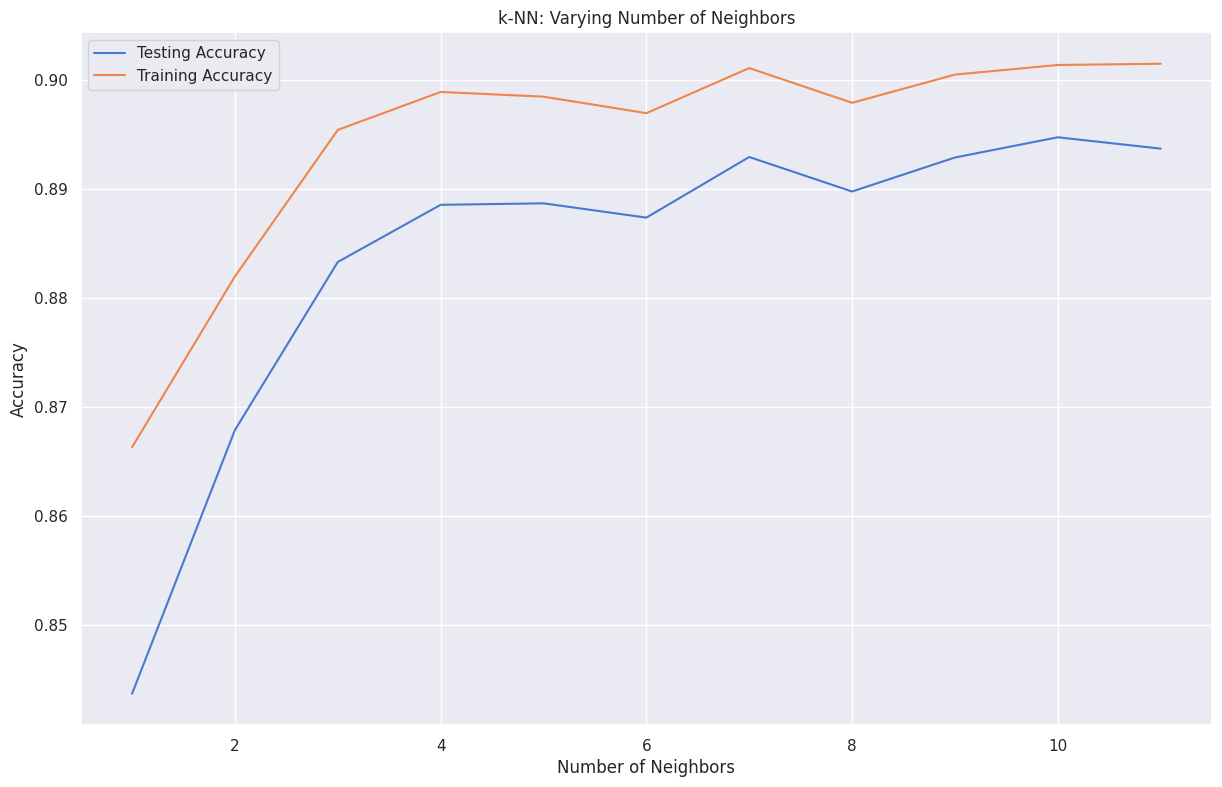

In [ ]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
start = time.time()

# Create the classifier
knn3 = KNeighborsClassifier(n_neighbors = 11)
print("The KNN classifier parameter:\n")
print(knn3)

# Fit it using the training data
knn3.fit(X_train, y_train)

# Predict the lables using the test dataset
pred_lables3 = knn3.predict(X_test)

# Calculate the accuracy
score3 = accuracy_score(y_test, pred_lables3)
print("\nAccuracy: {}".format(score3))

end = time.time()
print("\nExecution Seconds: {}".format((end - start)))

The KNN classifier parameter:

KNeighborsClassifier(n_neighbors=11)

Accuracy: 0.8936766034327009

Execution Seconds: 41.69089078903198
